In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer/Customers.csv
/kaggle/input/products/Products.csv
/kaggle/input/orders/Orders.csv
/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


In [2]:
import pandas as pd

# Load the full Superstore dataset
df = pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv', encoding='ISO-8859-1')

# See what columns exist
print(df.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [3]:
customers = df[['Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region']].drop_duplicates()
customers.rename(columns={
    'Customer ID': 'CustomerID',
    'Customer Name': 'CustomerName',
    'Postal Code': 'PostalCode'
}, inplace=True)
customers.to_csv('Customers.csv', index=False)


In [4]:
products = df[['Product ID', 'Product Name', 'Category', 'Sub-Category']].drop_duplicates()
products.rename(columns={
    'Product ID': 'ProductID',
    'Product Name': 'ProductName',
    'Sub-Category': 'SubCategory'
}, inplace=True)
products.to_csv('Products.csv', index=False)


In [5]:
orders = df[['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Product ID', 
             'Sales', 'Quantity', 'Discount', 'Profit']]

orders.rename(columns={
    'Order ID': 'OrderID',
    'Order Date': 'OrderDate',
    'Ship Date': 'ShipDate',
    'Ship Mode': 'ShipMode',
    'Customer ID': 'CustomerID',
    'Product ID': 'ProductID'
}, inplace=True)

orders.to_csv('Orders.csv', index=False)


/tmp/ipykernel_13/1249099205.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders.rename(columns={


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
customers = pd.read_csv('/kaggle/input/customer/Customers.csv')
orders = pd.read_csv('/kaggle/input/orders/Orders.csv')
products = pd.read_csv('/kaggle/input/products/Products.csv')


In [7]:
customers

,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region
0,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South
1,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West
2,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South
3,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West
4,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027,South
...,...,...,...,...,...,...,...,...
4905,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,California,90008,West
4906,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605,South
4907,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South
4908,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West


In [8]:
df = orders.merge(customers, on='CustomerID').merge(products, on='ProductID')
df.head()


,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,ProductID,Sales,Quantity,Discount,Profit,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductName,Category,SubCategory
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-BO-10001798,261.96,2,0.0,41.9136,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-BO-10001798,261.96,2,0.0,41.9136,Claire Gute,Consumer,United States,Houston,Texas,77070,Central,Bush Somerset Collection Bookcase,Furniture,Bookcases
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-BO-10001798,261.96,2,0.0,41.9136,Claire Gute,Consumer,United States,Dallas,Texas,75217,Central,Bush Somerset Collection Bookcase,Furniture,Bookcases
3,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-CH-10000454,731.94,3,0.0,219.5820,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
4,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-CH-10000454,731.94,3,0.0,219.5820,Claire Gute,Consumer,United States,Houston,Texas,77070,Central,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs


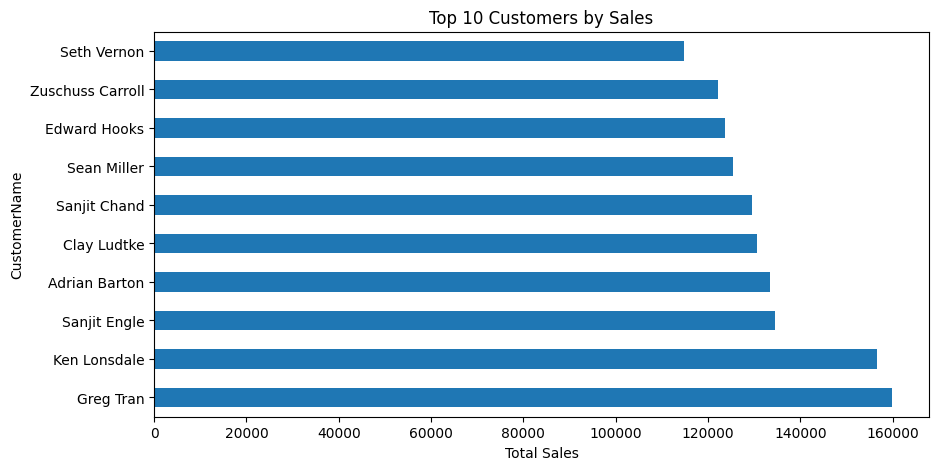

In [9]:
top_customers = df.groupby('CustomerName')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='barh', figsize=(10, 5), title='Top 10 Customers by Sales')
plt.xlabel("Total Sales")
plt.show()


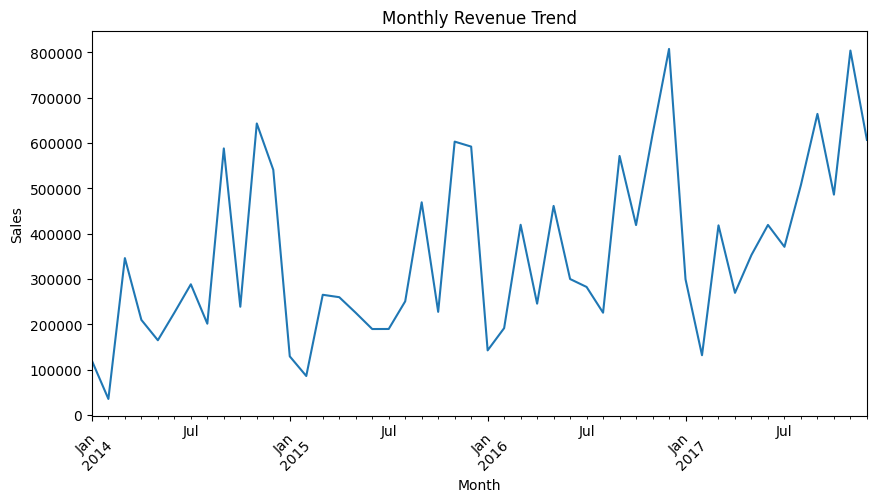

In [10]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Month'] = df['OrderDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', figsize=(10, 5), title='Monthly Revenue Trend')
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


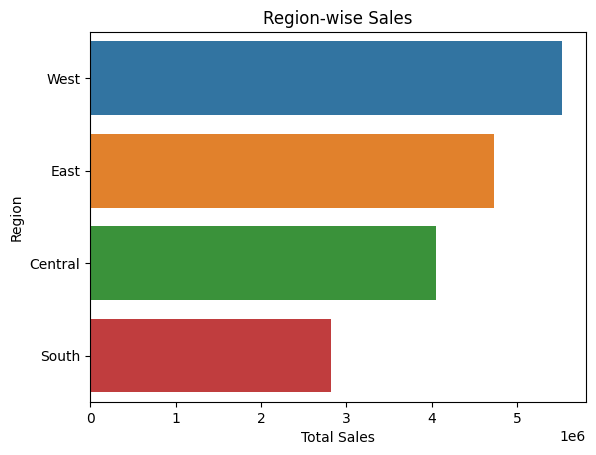

In [11]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.values, y=region_sales.index)
plt.title("Region-wise Sales")
plt.xlabel("Total Sales")
plt.show()


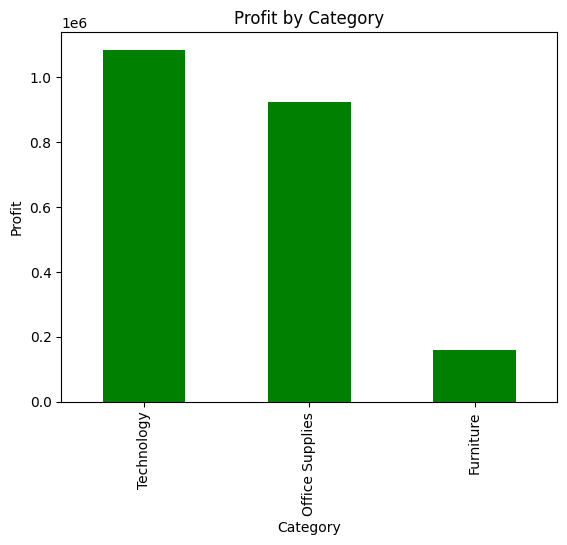

In [12]:
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
category_profit.plot(kind='bar', title='Profit by Category', color='green')
plt.ylabel("Profit")
plt.show()
